In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk("."):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./.config/.last_opt_in_prompt.yaml
./.config/active_config
./.config/.last_survey_prompt.yaml
./.config/config_sentinel
./.config/.last_update_check.json
./.config/gce
./.config/configurations/config_default
./.config/logs/2023.03.16/13.44.22.643153.log
./.config/logs/2023.03.16/13.43.22.764827.log
./.config/logs/2023.03.16/13.44.14.102664.log
./.config/logs/2023.03.16/13.44.49.666447.log
./.config/logs/2023.03.16/13.44.48.828779.log
./.config/logs/2023.03.16/13.43.48.359468.log
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/california_housing_train.csv
./sample_data/mnist_train_small.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_test.csv


# Q1. Dataset Labels and Splitting

In [2]:
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Reviews.csv',delimiter=',')
# Read reviews from csv and convert to df
# import csv
# df = pd.read_csv('/content/Reviews.csv',delimiter=',', quoting=csv.QUOTE_NONE,on_bad_lines='skip')
df.head(10)

Mounted at /content/gdrive


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [ ]:
# Check if there is any data in the dataset with a null value.
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [3]:
#Dropping "Na" rows
df = df.dropna()

In [4]:
#re-indexing the dataframe due to missing rows 
df = df.reset_index(drop=True)
df.shape

(568411, 10)

In [ ]:
# Check the data types of the dataset.
cat_columns = df.select_dtypes(include='O').columns
df[cat_columns]
# Display the data which is "String".

,ProductId,UserId,ProfileName,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
568406,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,Will not do without,Great for sesame chicken..this is a good if no...
568407,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,disappointed,I'm disappointed with the flavor. The chocolat...
568408,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568409,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
df = df.drop(columns=['Id','UserId','ProfileName','Time'])

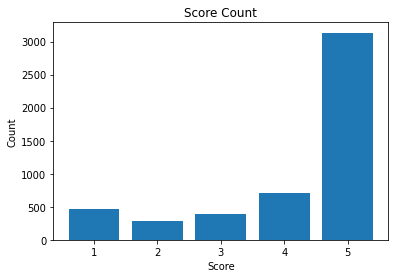

In [ ]:
import matplotlib.pyplot as plt
# Plot the score count

score_counts = df['Score'].value_counts().sort_index()
plt.bar(score_counts.index, score_counts.values)
plt.title('Score Count')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [6]:
# Taking a subset of the data to work on
df=df.head(5000)

In [7]:
# Split the dataset into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)


In [ ]:
# Print the label counts for each split
print("Label counts for training set:")
print(train_df['Score'].value_counts())

Label counts for training set:
5    1898
4     415
1     275
3     232
2     180
Name: Score, dtype: int64


In [ ]:
print("\nLabel counts for validation set:")
print(val_df['Score'].value_counts())


Label counts for validation set:
5    609
4    149
1     93
3     88
2     61
Name: Score, dtype: int64


In [ ]:
print("\nLabel counts for test set:")
print(test_df['Score'].value_counts())


Label counts for test set:
5    627
4    148
1    101
3     75
2     49
Name: Score, dtype: int64


# Q2. Data Clustering:

In [8]:
# Combine summary and text into new column words
train_df['words']=train_df['Summary']+'  '+train_df['Text']
val_df['words']=val_df['Summary']+'  '+val_df['Text']
test_df['words']=test_df['Summary']+'  '+test_df['Text']
train_df.head(10)

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,words
4702,B00139TT72,0,0,5,Good Stuff,I feed my two Pugs and occasional rescue Newma...,Good Stuff I feed my two Pugs and occasional ...
2155,B002BB7EWI,0,1,3,Glorified baby food,"I know these are super trendy right now, and I...",Glorified baby food I know these are super tr...
289,B001UJEN6C,7,8,5,Great Energy,I bought these for my husband and he said they...,Great Energy I bought these for my husband an...
1822,B001RVFDOO,0,1,5,GREAT CRUNCH SOLUTION!!!!!!!!!!!!!!,I HAPPENED UPON THIS ITEM IN MY LOCAL DELI AND...,GREAT CRUNCH SOLUTION!!!!!!!!!!!!!! I HAPPENE...
3442,B005K4Q1VI,0,1,5,Great Hot Chocolate,This is really great Hot chocolate. The price ...,Great Hot Chocolate This is really great Hot ...
521,B000G6RYNE,0,1,3,Too Much Flavor,These things are just too darn cheesy. If you ...,Too Much Flavor These things are just too dar...
3804,B000X2CWTM,32,33,5,Real Licorice,I received a box of this for Christmas. It is ...,Real Licorice I received a box of this for Ch...
678,B000G6MBX2,2,2,4,Very different flavor,I love these chips. The flavor is not plain. T...,Very different flavor I love these chips. The...
2294,B003WWJ8LA,0,1,1,Avoid This Seloler,The picture shown is for three packages and th...,Avoid This Seloler The picture shown is for t...
3623,B000R1BPOC,0,2,5,Lazzaroni Tin,"A little more money than your average cookie, ...",Lazzaroni Tin A little more money than your a...


In [ ]:
# Data pipeline for tokenizations, stemming and stopword removal
import spacy
nlp = spacy.load("en_core_web_sm")
def text_pipeline_spacy(text):
  tokens = []
  doc = nlp(text)
  for t in doc:
    if not t.is_stop and not t.is_punct and not t.is_space:
      tokens.append(t.lemma_.lower())
  return tokens

In [ ]:
# Removing HTML tags from text
from bs4 import BeautifulSoup
def text_pipeline(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    tokens = text_pipeline_spacy(text)
    return tokens

In [ ]:
# Testing text preprocessing
from tqdm import tqdm # This provides a nice progress bar
tokens=[]
for rev in tqdm(train_df['words'].head(10)):
  tokens.append(text_pipeline(rev))

100%|██████████| 10/10 [00:00<00:00, 57.09it/s]


In [ ]:
train_df['words'].head(10)

4702    Good Stuff  I feed my two Pugs and occasional ...
2155    Glorified baby food  I know these are super tr...
289     Great Energy  I bought these for my husband an...
1822    GREAT CRUNCH SOLUTION!!!!!!!!!!!!!!  I HAPPENE...
3442    Great Hot Chocolate  This is really great Hot ...
521     Too Much Flavor  These things are just too dar...
3804    Real Licorice  I received a box of this for Ch...
678     Very different flavor  I love these chips. The...
2294    Avoid This Seloler  The picture shown is for t...
3623    Lazzaroni Tin  A little more money than your a...
Name: words, dtype: object

In [ ]:
tokens

[['good',
  'stuff',
  'feed',
  'pugs',
  'occasional',
  'rescue',
  'newman',
  'advanced',
  'dog',
  'formula',
  'like',
  'well',
  'regular',
  'newman',
  'ingredient',
  'supplement',
  'high',
  'quality',
  'food',
  'organic',
  'free',
  'range',
  'chicken',
  'healthy',
  'powder',
  'salmon',
  'oil',
  'boy',
  'healthy',
  'coat',
  'amazing',
  'highly',
  'recommend',
  'supplement'],
 ['glorify',
  'baby',
  'food',
  'know',
  'super',
  'trendy',
  'right',
  'totally',
  'want',
  'love',
  'product',
  'exact',
  'want',
  'toddler',
  'love',
  'product',
  'take',
  'taste',
  'hand',
  'say',
  'give',
  'baby',
  'food',
  'mom',
  'taste',
  'right',
  'taste',
  'like',
  'jarred',
  'baby',
  'food',
  'consistency',
  'thick',
  'kid',
  'like',
  'packaging',
  'great',
  'kid',
  'expensive',
  'baby',
  'food',
  'go',
  'rest',
  'baby',
  'toddler',
  'bit',
  'interested'],
 ['great',
  'energy',
  'buy',
  'husband',
  'say',
  'good',
  'energy

In [ ]:
# Step 0: Vectorise text
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist
import numpy as np

vectorizer = TfidfVectorizer(tokenizer=text_pipeline)
X = vectorizer.fit_transform(train_df['words'])
V = vectorizer.transform(val_df['words'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-52-4a42384e9563>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
X.shape

(3000, 10276)

In [ ]:
terms = vectorizer.get_feature_names_out()
terms[1:10]

array(['"but', '"con', '"i', '"i\'ll', '"mandarin', '"researcher',
       '"stacey', '"the', '$'], dtype=object)

KMEANS OWN IMPLEMENTATION

In [ ]:
# Step 1: Select k random centroids
def init_centroids(k):
    return X[np.random.choice(X.shape[0], k, replace=False), :].toarray()

# Step 2: Assign each vector to its closest centroid
def assign_clusters(centroids):
    distances = cdist(X.toarray(), centroids)
    return np.argmin(distances, axis=1)

# Step 3: Recalculate the centroids based on the closest vectors
def update_centroids(clusters, k):
    new_centroids = []
    for i in range(k):
        members = X[clusters == i].toarray()
        if members.shape[0] == 0:
            # No members in this cluster
            new_centroids.append(init_centroids(1)[0])
        else:
            new_centroids.append(members.mean(axis=0))
    return np.vstack(new_centroids)

# K-means algorithm
def kmeans(k, max_iter=500):
    centroids = init_centroids(k) 
#     print(centroids)
    for i in range(max_iter):
        clusters = assign_clusters(centroids)
        new_centroids = update_centroids(clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

In [ ]:
# Clustering training data with k=5
clusters, centroids = kmeans(5)

In [ ]:
# Print top tokens for each cluster
terms = vectorizer.get_feature_names_out()
order_centroids = centroids.argsort()[:, ::-1]
for i in range(5):
    print(f"Cluster: {i+1}", end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print()

Cluster: 1 good great product taste love like buy flavor find
Cluster: 2 tea pancake mix gluten waffle free bisquick good great
Cluster: 3 dog food cat love newman eat organic feed treat
Cluster: 4 coffee cup hot chocolate cocoa k good taste flavor
Cluster: 5 chip bag flavor salt potato good love kettle great


In [ ]:
# Get document examples for each cluster
for i in range(5):
    cluster_docs = train_df.iloc[np.where(clusters == i)]
    print(f"Cluster {i+1} documents:")
    for index, row in cluster_docs.head(5).iterrows():
        print(row['Text'])
    print("\n")

Cluster 1 documents:
I know these are super trendy right now, and I totally wanted to love this product (or, to be more exact, I wanted my toddler to love this product). He took one taste, handed it back to me, and said, "Why you gave me baby food, mom?" I tasted it, and he is right. It tastes just like jarred baby food. Same consistency (not any thicker), too. If your kid likes the packaging, great. If your kid doesn't, then it is just really, really expensive baby food. I'm going to give the rest to my baby, as the toddler is not the least bit interested.
I bought these for my husband and he said they are the best energy shots out there. He takes one in the mornings and works hard all day. Good stuff!
These things are just too darn cheesy. If you like a lot of flavor, you'll love these. Otherwise, you will overdose on their cheddary goodness.
I received a box of this for Christmas. It is really good. Not overly strong like most black licorice. It is indeed soft and it has a very simp

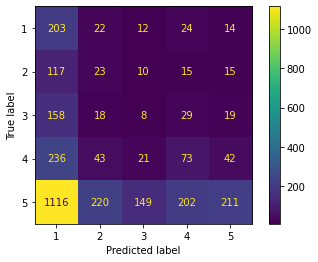

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

target_labels = train_df['Score']

# Assign target labels to each cluster
assigned_labels = []
for i in range(0,5):
    cluster_indices = np.where(clusters == i)[0]
    cluster_target_labels = clusters[cluster_indices]
    assigned_label = np.bincount(cluster_target_labels).argmax()+1
    assigned_labels.append(assigned_label)

# Define label descriptions
label_names = ['1', '2', '3', '4', '5']

# Construct confusion matrix
conf_matrix = confusion_matrix(target_labels, [assigned_labels[c] for c in clusters])
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names).plot()


In [9]:
# Redefining Target Labels
# Target Label 2: Positive sentiment reviews, Target Label 0: Negative sentiment reviews, Target Label 1: Neutral sentiment reviews
train_df['target'] = train_df['Score'].map({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})
val_df['target'] = val_df['Score'].map({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})

# Q3. Comparing Classifiers

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string

# # create feature matrix and target vector
vectorizer = TfidfVectorizer(tokenizer=text_pipeline)
X_train_tfidf = X
X_val_tfidf = V

cvectorizer = CountVectorizer()
X_train_count = cvectorizer.fit_transform(train_df['words'])
X_val_count = cvectorizer.transform(val_df['words'])

y_train = train_df["target"]
y_val = val_df["target"]

In [22]:
# evaluate performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

In [ ]:
# 1. Dummy Classifier with strategy="most_frequent"
dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(X_train_count, y_train)
y_pred_dummy_most_frequent = dummy_most_frequent.predict(X_val_count)

# 2. Dummy Classifier with strategy="stratified"
dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(X_train_count, y_train)
y_pred_dummy_stratified = dummy_stratified.predict(X_val_count)

# 3. LogisticRegression with One-hot vectorization
lr_count = LogisticRegression(max_iter=10000)
lr_count.fit(X_train_count, y_train)
y_pred_lr_count = lr_count.predict(X_val_count)

# 4. LogisticRegression with TF-IDF vectorization
lr_tfidf = LogisticRegression(max_iter=10000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_val_tfidf)

# 5. SVC Classifier with One-hot vectorization
svc_count = SVC()
svc_count.fit(X_train_count, y_train)
y_pred_svc_count = svc_count.predict(X_val_count)

In [ ]:
# Random Forest Classifier with TF-IDF vectorization:
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf_train = rf_tfidf.predict(X_train_tfidf)
y_pred_rf_tfidf_val = rf_tfidf.predict(X_val_tfidf)

In [ ]:
# Evaluate models on training set
models = {
    "Most Frequent": dummy_most_frequent,
    "Stratified": dummy_stratified,
    "LR Count": lr_count,
    "LR TF-IDF": lr_tfidf,
    "SVC Count": svc_count,
    "RF TF-IDF": rf_tfidf,
}

train_scores = []
for name, model in models.items():
    if name == "LR Count":
        X_tr = X_train_count
    elif name == "LR TF-IDF" or name=="RF TF-IDF":
        X_tr = X_train_tfidf
    else:
        X_tr = X_train_count
    y_pred_train = model.predict(X_tr)
    scores_train = evaluate_model(y_train, y_pred_train)
    train_scores.append([name] + list(scores_train))

# Evaluate models on validation set
val_scores = []
for name, model in models.items():
    if name == "LR Count":
        X_val = X_val_count
    elif name == "LR TF-IDF"  or name=="RF TF-IDF":
        X_val = X_val_tfidf
    else:
        X_val = X_val_count
    y_pred_val = model.predict(X_val)
    scores_val = evaluate_model(y_val, y_pred_val)
    val_scores.append([name] + list(scores_val))

# Print evaluation metrics
print("Training Set Performance")
print("========================")
print(pd.DataFrame(train_scores, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1"]))

print("\nValidation Set Performance")
print("==========================")
df_val_scores = pd.DataFrame(val_scores, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1"])
df_val_scores.set_index("Classifier", inplace=True)
df_val_scores = df_val_scores.round(3)
print(df_val_scores)



Training Set Performance
      Classifier  Accuracy  Precision    Recall        F1
0  Most Frequent  0.771000   0.923667  0.333333  0.290232
1     Stratified  0.618667   0.334435  0.334521  0.334449
2       LR Count  1.000000   1.000000  1.000000  1.000000
3      LR TF-IDF  0.871333   0.933664  0.575444  0.627235
4      SVC Count  0.856333   0.937609  0.553271  0.623992
5      RF TF-IDF  1.000000   1.000000  1.000000  1.000000

Validation Set Performance
               Accuracy  Precision  Recall     F1
Classifier                                       
Most Frequent     0.758      0.919   0.333  0.287
Stratified        0.620      0.336   0.336  0.336
LR Count          0.817      0.613   0.558  0.578
LR TF-IDF         0.804      0.735   0.448  0.464
SVC Count         0.775      0.891   0.372  0.359
RF TF-IDF         0.790      0.719   0.408  0.415


<Axes: title={'center': 'Performance of LR Count on Validation Set'}>

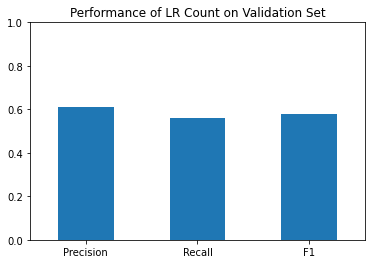

In [ ]:
# Plot scores for best performing classifier
best_classifier = df_val_scores["F1"].idxmax()
f1_scores = df_val_scores.loc[best_classifier, ["Precision", "Recall", "F1"]]
f1_scores.index = ["Precision", "Recall", "F1"]
f1_scores.plot(kind="bar", ylim=[0, 1], rot=0, title=f"Performance of {best_classifier} on Validation Set")

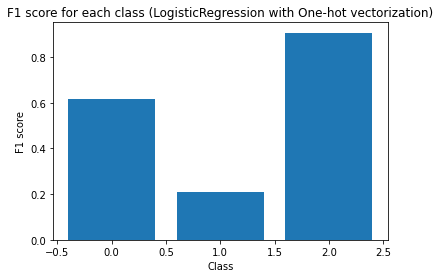

In [ ]:
# F1 scores for each class in LogisticRegression with One-hot vectorization
from sklearn.metrics import classification_report

lr_count = LogisticRegression(max_iter=10000)
lr_count.fit(X_train_count, y_train)
y_pred_lr_count = lr_count.predict(X_val_count)

# Get F1 score for each class
report = classification_report(y_val, y_pred_lr_count, output_dict=True)
f1_scores = [report[str(label)]['f1-score'] for label in sorted(set(y_val))]

labels = sorted(set(y_val))
plt.bar(labels, f1_scores)
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.title('F1 score for each class (LogisticRegression with One-hot vectorization)')
plt.show()

# Q4. Parameter Tuning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for tuning
param_grid = {
    'C': [1, 10, 0.01, 10000, 100, 1000],
}

# Initialize the best parameters and score
best_params, best_score = None, 0

# Iterate over all combinations of parameters in the grid
for params in ParameterGrid(param_grid):
    # Initialize the vectorizer and fit it on the training data
    vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy 
                                #  ,sublinear_tf=params['sublinear_tf'],
                                #  max_features=params['max_features']
                                 )
    train_X = vectorizer.fit_transform(train_df['words'])
    X_val = vectorizer.transform(val_df['words'])

    # Initialize the classifier and fit it on the training data
    clf = LogisticRegression(random_state=42, C=params['C'],max_iter=10000)
    clf.fit(train_X, y_train)

    # Predict labels on the validation set and compute metrics
    y_pred = clf.predict(X_val)
    scores_val = evaluate_model(y_val, y_pred)
    f1=scores_val[3]
    print()
    print(f"Evaluating {params=}")
    print("Accuracy", scores_val[0])
    print("Precision", scores_val[1])
    print("Recall", scores_val[2])
    print("F1", scores_val[3])
    # Update the best parameters and score if current parameters perform better
    if f1 > best_score:
        best_params = params
        best_score = f1

# Print the best parameters and score
print(f"Best params: {best_params}")
print(f"Best score: {best_score:.3f}")


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1}
Accuracy 0.803
Precision 0.844344602008289
Recall 0.4460559229688517
F1 0.4610709385359108


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 10}
Accuracy 0.815
Precision 0.6016944221190935
Recall 0.5129170521650733
F1 0.5306108337868198


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 0.01}
Accuracy 0.758
Precision 0.9193333333333333
Recall 0.3333333333333333
F1 0.28744785741372775


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 10000}
Accuracy 0.803
Precision 0.5644819277108434
Recall 0.5195105026899222
F1 0.534050122643264


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 100}
Accuracy 0.805
Precision 0.5667180619799698
Recall 0.5118676398359776
F1 0.5276595508438574


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000}
Accuracy 0.804
Precision 0.567406383938642
Recall 0.519950256427829
F1 0.5351126303074178
Best params: {'C': 1000}
Best score: 0.535


In [ ]:
# Define the parameter grid for tuning
param_grid = {
    'C': [best_params['C']],
    'max_features': [None, 5000, 10000, 20000, 50000],
}

# Initialize the best parameters and score
best_params, best_score = None, 0

# Iterate over all combinations of parameters in the grid
for params in ParameterGrid(param_grid):
    # Initialize the vectorizer and fit it on the training data
    vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy, 
                                #  ,sublinear_tf=params['sublinear_tf'],
                                 max_features=params['max_features']
                                 )
    train_X = vectorizer.fit_transform(train_df['words'])
    X_val = vectorizer.transform(val_df['words'])

    # Initialize the classifier and fit it on the training data
    clf = LogisticRegression(random_state=42, C=params['C'],max_iter=10000)
    clf.fit(train_X, y_train)

    # Predict labels on the validation set and compute metrics
    y_pred = clf.predict(X_val)
    scores_val = evaluate_model(y_val, y_pred)
    f1=scores_val[3]
    print()
    print(f"Evaluating {params=}")
    print("Accuracy", scores_val[0])
    print("Precision", scores_val[1])
    print("Recall", scores_val[2])
    print("F1", scores_val[3])
    # Update the best parameters and score if current parameters perform better
    if f1 > best_score:
        best_params = params
        best_score = f1

# Print the best parameters and score
print(f"Best params: {best_params}")
print(f"Best score: {best_score:.3f}")


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None}
Accuracy 0.804
Precision 0.567406383938642
Recall 0.519950256427829
F1 0.5351126303074178


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': 5000}
Accuracy 0.802
Precision 0.5554501158349833
Recall 0.5157226239020435
F1 0.5281869682706554


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': 10000}
Accuracy 0.802
Precision 0.5666051018873599
Recall 0.5190707489520154
F1 0.5342740558839377


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': 20000}
Accuracy 0.804
Precision 0.567406383938642
Recall 0.519950256427829
F1 0.5351126303074178


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': 50000}
Accuracy 0.804
Precision 0.567406383938642
Recall 0.519950256427829
F1 0.5351126303074178
Best params: {'C': 1000, 'max_features': None}
Best score: 0.535


In [ ]:
# Define the parameter grid for tuning
param_grid = {
    'C':[best_params['C']],
    'sublinear_tf': [True, False],
    'max_features': [best_params['max_features']],
}

# Initialize the best parameters and score
best_params, best_score = None, 0

# Iterate over all combinations of parameters in the grid
for params in ParameterGrid(param_grid):
    # Initialize the vectorizer and fit it on the training data
    vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy ,sublinear_tf=params['sublinear_tf'],max_features=params['max_features'])
    train_X = vectorizer.fit_transform(train_df['words'])
    X_val = vectorizer.transform(val_df['words'])

    # Initialize the classifier and fit it on the training data
    clf = LogisticRegression(random_state=42, C=params['C'],max_iter=10000)
    clf.fit(train_X, y_train)

    # Predict labels on the validation set and compute metrics
    y_pred = clf.predict(X_val)
    scores_val = evaluate_model(y_val, y_pred)
    f1=scores_val[3]
    print()
    print(f"Evaluating {params=}")
    print("Accuracy", scores_val[0])
    print("Precision", scores_val[1])
    print("Recall", scores_val[2])
    print("F1", scores_val[3])
    # Update the best parameters and score if current parameters perform better
    if f1 > best_score:
        best_params = params
        best_score = f1

# Print the best parameters and score
print(f"Best params: {best_params}")
print(f"Best score: {best_score:.3f}")


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None, 'sublinear_tf': True}
Accuracy 0.809
Precision 0.5623602415026834
Recall 0.5223517687238004
F1 0.5337370581194185


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None, 'sublinear_tf': False}
Accuracy 0.804
Precision 0.567406383938642
Recall 0.519950256427829
F1 0.5351126303074178
Best params: {'C': 1000, 'max_features': None, 'sublinear_tf': False}
Best score: 0.535


In [ ]:
# Define the parameter grid for tuning
param_grid = {
    'C': [best_params['C']],
    'sublinear_tf': [best_params['sublinear_tf']],
    'max_features': [best_params['max_features']],
    'solver':['lbfgs','liblinear','newton-cg','sag','saga']

}


# Initialize the best parameters and score
best_params, best_score = None, 0

# Iterate over all combinations of parameters in the grid
for params in ParameterGrid(param_grid):
    # Initialize the vectorizer and fit it on the training data
    vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy ,sublinear_tf=params['sublinear_tf'],max_features=params['max_features'])
    train_X = vectorizer.fit_transform(train_df['words'])
    X_val = vectorizer.transform(val_df['words'])

    # Initialize the classifier and fit it on the training data
    clf = LogisticRegression(random_state=42, C=params['C'],solver=params['solver'],max_iter=10000)
    clf.fit(train_X, y_train)

    # Predict labels on the validation set and compute metrics
    y_pred = clf.predict(X_val)
    scores_val = evaluate_model(y_val, y_pred)
    f1=scores_val[3]
    print()
    print(f"Evaluating {params=}")
    print("Accuracy", scores_val[0])
    print("Precision", scores_val[1])
    print("Recall", scores_val[2])
    print("F1", scores_val[3])
    # Update the best parameters and score if current parameters perform better
    if f1 > best_score:
        best_params = params
        best_score = f1

# Print the best parameters and score
print(f"Best params: {best_params}")
print(f"Best score: {best_score:.3f}")


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None, 'solver': 'lbfgs', 'sublinear_tf': False}
Accuracy 0.804
Precision 0.567406383938642
Recall 0.519950256427829
F1 0.5351126303074178


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None, 'solver': 'liblinear', 'sublinear_tf': False}
Accuracy 0.806
Precision 0.5639957880171038
Recall 0.5192063872802659
F1 0.5326788582602536


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None, 'solver': 'newton-cg', 'sublinear_tf': False}
Accuracy 0.804
Precision 0.567406383938642
Recall 0.519950256427829
F1 0.5351126303074178


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None, 'solver': 'sag', 'sublinear_tf': False}
Accuracy 0.806
Precision 0.5707645864874921
Recall 0.5208297639036426
F1 0.5362723041512673


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Evaluating params={'C': 1000, 'max_features': None, 'solver': 'saga', 'sublinear_tf': False}
Accuracy 0.804
Precision 0.555954790823212
Recall 0.5167035031810757
F1 0.5273875257133296
Best params: {'C': 1000, 'max_features': None, 'solver': 'sag', 'sublinear_tf': False}
Best score: 0.536


In [ ]:
# Using the best parameters obtained
vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy ,sublinear_tf=best_params['sublinear_tf'], max_features=best_params['max_features'])
train_X = vectorizer.fit_transform(train_df['words'])
X_val = vectorizer.transform(val_df['words'])

# Initialize the classifier and fit it on the training data
clf = LogisticRegression(random_state=42, C=best_params['C'], solver=best_params['solver'],max_iter=10000)
clf.fit(train_X, y_train)

# Predict labels on the validation set and compute metrics
y_pred = clf.predict(X_val)
scores_val = evaluate_model(y_val, y_pred)
print("Optimised Metrics:")
print("Accuracy", scores_val[0])
print("Precision", scores_val[1])
print("Recall", scores_val[2])
print("F1", scores_val[3])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Optimised Metrics:
Accuracy 0.806
Precision 0.5707645864874921
Recall 0.5208297639036426
F1 0.5362723041512673


# Q5. Context vectors using BERT

In [10]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 23.6 MB/s eta 0:00:00


In [11]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TextDataset, DataCollatorWithPadding
from transformers import Trainer, TrainingArguments
import torch
from transformers import pipeline
from transformers import RobertaTokenizer, TFRobertaModel

In [13]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from transformers import pipeline, RobertaTokenizer

# Load the tokenizer and the feature-extraction pipeline
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
feature_extraction = pipeline(task='feature-extraction', model='roberta-base', max_length=512, truncation=True, padding=True)

# Define a function to encode the text of the documents using the feature-extraction pipeline
def encode_text(text): 
    # Extract the first context vector for each document
    encoded_text = feature_extraction(text)
    return encoded_text[0][0]


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
# Encode the text of the documents in the training sets
texts = train_df['words'].values.tolist()
X_train = [encode_text(t) for t in texts]
y_train = train_df["target"]

In [15]:
# Encode the text of the documents in the validation sets
texts = val_df['words'].values.tolist()
X_val = [encode_text(t) for t in texts]
y_val = val_df["target"]

In [16]:
# Train a LogisticRegression classifier on the encoded training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the encoded validation data
y_pred = clf.predict(X_val)

# Evaluate the performance of the classifier on the validation set
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.69      0.74       154
           1       0.22      0.02      0.04        88
           2       0.87      0.99      0.93       758

    accuracy                           0.86      1000
   macro avg       0.63      0.57      0.57      1000
weighted avg       0.80      0.86      0.82      1000



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Import necessary libraries
from transformers import RobertaForSequenceClassification, RobertaTokenizerFast, Trainer, TrainingArguments
from datasets import Dataset

# Load the model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)
X_train=tokenizer(train_df['words'].values.tolist(),truncation=True,padding=True)
X_val=tokenizer(val_df['words'].values.tolist(),truncation=True,padding=True)
X_train["labels"] = y_train.tolist()
X_val["labels"] = y_val.tolist()
# Define the training and validation datasets
train_dataset = Dataset.from_dict(X_train)
val_dataset = Dataset.from_dict(X_val)



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [18]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    # evaluation_strategy='epoch',
    learning_rate=1e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0,
)


In [19]:
# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
    )


In [20]:
# Train the model
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=188, training_loss=0.7143966999459774, metrics={'train_runtime': 74.156, 'train_samples_per_second': 40.455, 'train_steps_per_second': 2.535, 'total_flos': 789347340288000.0, 'train_loss': 0.7143966999459774, 'epoch': 1.0})

In [26]:
# Evaluate the performance of the model on the validation set
eval_result = trainer.evaluate(eval_dataset=val_dataset)
print(eval_result)

{'eval_loss': 0.7239181995391846, 'eval_accuracy': 0.758, 'eval_precision': 0.25266666666666665, 'eval_recall': 0.3333333333333333, 'eval_f1': 0.28744785741372775, 'eval_runtime': 7.7086, 'eval_samples_per_second': 129.726, 'eval_steps_per_second': 8.173, 'epoch': 1.0}


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Define the training arguments
model1 = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)
training_args1 = TrainingArguments(
    output_dir='./results',
    # evaluation_strategy='epoch',
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0,
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [28]:
trainer1 = Trainer(
    model=model1,
    args=training_args1,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
    )
trainer1.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=376, training_loss=0.356373482562126, metrics={'train_runtime': 142.5165, 'train_samples_per_second': 42.1, 'train_steps_per_second': 2.638, 'total_flos': 1578694680576000.0, 'train_loss': 0.356373482562126, 'epoch': 2.0})

In [29]:
# Evaluate the performance of the model on the validation set
eval_result1 = trainer1.evaluate(eval_dataset=val_dataset)
print(eval_result1)

{'eval_loss': 0.29955199360847473, 'eval_accuracy': 0.891, 'eval_precision': 0.7318535496622615, 'eval_recall': 0.7266273743846302, 'eval_f1': 0.7265556056147698, 'eval_runtime': 7.6591, 'eval_samples_per_second': 130.564, 'eval_steps_per_second': 8.226, 'epoch': 2.0}


In [30]:
# Define the training arguments
model2 = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)
training_args2 = TrainingArguments(
    output_dir='./results',
    # evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0,
)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [31]:
trainer2 = Trainer(
    model=model2,
    args=training_args2,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
    )
trainer2.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.336600


Step,Training Loss
500,0.336600


TrainOutput(global_step=940, training_loss=0.23593306034169298, metrics={'train_runtime': 358.3694, 'train_samples_per_second': 41.856, 'train_steps_per_second': 2.623, 'total_flos': 3946736701440000.0, 'train_loss': 0.23593306034169298, 'epoch': 5.0})

In [32]:
# Evaluate the performance of the model on the validation set
eval_result2 = trainer2.evaluate(eval_dataset=val_dataset)
print(eval_result2)

{'eval_loss': 0.4715457856655121, 'eval_accuracy': 0.894, 'eval_precision': 0.7490925568244009, 'eval_recall': 0.7409336485853637, 'eval_f1': 0.7449355419709679, 'eval_runtime': 7.6433, 'eval_samples_per_second': 130.833, 'eval_steps_per_second': 8.242, 'epoch': 5.0}


In [33]:
# Define the training arguments
model3 = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)
training_args3 = TrainingArguments(
    output_dir='./results',
    # evaluation_strategy='epoch',
    learning_rate=1e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0,
)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [34]:
trainer3 = Trainer(
    model=model3,
    args=training_args3,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
    )
trainer3.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.705900
1000,0.698000
1500,0.691000


Step,Training Loss
500,0.705900
1000,0.698000
1500,0.691000


TrainOutput(global_step=1880, training_loss=0.6960001194730718, metrics={'train_runtime': 720.1706, 'train_samples_per_second': 41.657, 'train_steps_per_second': 2.61, 'total_flos': 7893473402880000.0, 'train_loss': 0.6960001194730718, 'epoch': 10.0})

In [35]:
# Evaluate the performance of the model on the validation set
eval_result3 = trainer3.evaluate(eval_dataset=val_dataset)
print(eval_result3)

{'eval_loss': 0.7156162858009338, 'eval_accuracy': 0.758, 'eval_precision': 0.25266666666666665, 'eval_recall': 0.3333333333333333, 'eval_f1': 0.28744785741372775, 'eval_runtime': 7.6952, 'eval_samples_per_second': 129.952, 'eval_steps_per_second': 8.187, 'epoch': 10.0}


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Q6. Best Approach on Test Data

In [36]:
test_df['target'] = test_df['Score'].map({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})
y_test = test_df['target']
texts = test_df['words'].values.tolist()
X_test = [encode_text(t) for t in texts]

In [37]:
X_test=tokenizer(test_df['words'].values.tolist(),truncation=True,padding=True)
X_test["labels"] = y_test.tolist()
test_dataset = Dataset.from_dict(X_test)

In [38]:
predictions, label_ids, metrics = trainer2.predict(test_dataset)
print(metrics)

{'test_loss': 0.4330006241798401, 'test_accuracy': 0.894, 'test_precision': 0.7197406567088928, 'test_recall': 0.7212903225806452, 'test_f1': 0.7201285303733037, 'test_runtime': 7.6739, 'test_samples_per_second': 130.313, 'test_steps_per_second': 8.21}


In [39]:
print(f"{predictions.shape=}")

predictions.shape=(1000, 4)


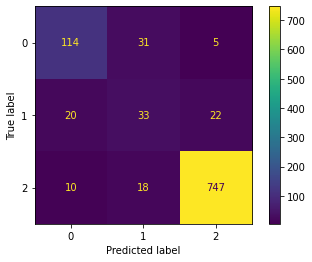

In [42]:
# Get the predicted labels and true labels
predicted_labels = predictions.argmax(axis=1)
true_labels = label_ids

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=confusion).plot()